In [1]:
# Import Packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Read in the dataset to CSV
df = pd.read_csv('medical_clean.csv')

# Prepare Dataset for Analysis

In [3]:
# Explore variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
# Reduce dataset to selected continuous variables
selected_variables = ['Income', 'VitD_levels', 'Initial_days', 'TotalCharge', 'Additional_charges']
reduced_df = df[selected_variables]
reduced_df.head()

,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges
0,86575.93,19.141466,10.585770,3726.702860,17939.403420
1,46805.99,18.940352,15.129562,4193.190458,17612.998120
2,14370.14,18.057507,4.772177,2434.234222,17505.192460
3,39741.49,16.576858,1.714879,2127.830423,12993.437350
4,1209.56,17.439069,1.254807,2113.073274,3716.525786


In [5]:
# Standardize continuous variables (Boeye, n.d.a)
# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit/transform the reduced dataset using the StandardScaler object which results in an array
scaled_array = scaler.fit_transform(reduced_df)

# Convert the array into a dataframe using the same columns as reduced_df
scaled_df = pd.DataFrame(scaled_array, columns=reduced_df.columns)

# View the first five rows of the scaled data
scaled_df.head()

,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges
0,1.615914,0.583603,-0.907310,-0.727185,0.765005
1,0.221443,0.483901,-0.734595,-0.513228,0.715114
2,-0.915870,0.046227,-1.128292,-1.319983,0.698635
3,-0.026263,-0.687811,-1.244503,-1.460517,0.009004
4,-1.377325,-0.260366,-1.261991,-1.467285,-1.408991


In [6]:
# Export the scaled dataset to CSV
scaled_df.to_csv('Prepared Dataset.csv')

# Perform initial PCA to determine number of components

In [7]:
# Perform initial PCA to determine number of components (Boeye, n.d.b)
# Initialize a PCA object
pca = PCA()

# Fit the scaled data to the object
pca.fit(scaled_df)

PCA()

In [8]:
# Print the Principal Components Matrix (Wilson, n.d.a)
principal_components = pca.components_
print('Principal Components Matrix:')
print(principal_components)

Principal Components Matrix:
[[-0.01936628 -0.00314627  0.70660308  0.70692268  0.02423753]
 [ 0.60952068 -0.60108272  0.02346515  0.00827001 -0.51629943]
 [ 0.27669209 -0.44957071 -0.02175579 -0.0017847   0.84902954]
 [ 0.74266388  0.6607373   0.00837149  0.01121288  0.10807758]
 [ 0.00115411 -0.00143674 -0.70683667  0.70715134 -0.01776261]]


# Produce Scree plot

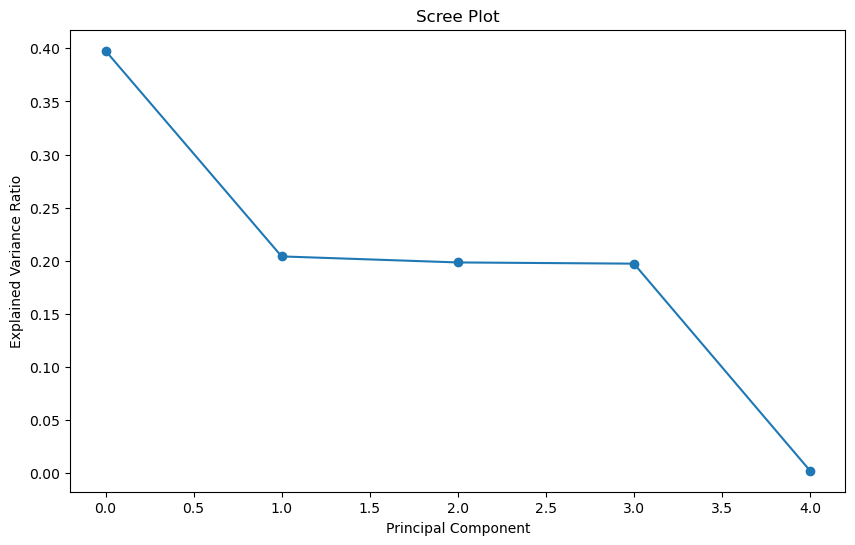

In [9]:
# Create a Scree plot showing the explained variance ratio of each Principal Component (Boeye, n.d.c)
# Create the plot
plt.figure(figsize=(10,6))
plt.plot(pca.explained_variance_ratio_, marker='o')

# Add chart elements
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Show the plot
plt.show()

# Re-apply PCA with two components

In [10]:
# Initialize a PCA object, this time with two components
pca = PCA(n_components=2)

# Fit the scaled data to the object
pca.fit(scaled_df)

PCA(n_components=2)

In [11]:
# Determine Explained Variance Ratio for each Principal Component (Boeye, n.d.b)
print('Explained Variance Ratio for each Principal Component:')
print(pca.explained_variance_ratio_)

Explained Variance Ratio for each Principal Component:
[0.39771921 0.20411625]


In [12]:
# Determine Total Variance (Boeye, n.d.b)
print('Total Variance Captured by Two Components:')
print(pca.explained_variance_ratio_.sum())

Total Variance Captured by Two Components:
0.6018354640861929
